<a href="https://colab.research.google.com/github/vishnoor/Course/blob/master/MLR_Sample_Assingment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Read training data
train = pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/QNdMORzykKkG4L3WQ17Xx53o3/insurance_training.csv")

# Read test data
test = pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/Mq5p8YpQoz3KbWJRE4Mey1Yoq/insurance_test.csv")



In [93]:
train.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,BMI_group,charges
0,560,46,0,19.95,2,0,1,1,9193.83850
1,1285,47,0,24.32,0,0,0,1,8534.67180
2,1142,52,0,24.86,0,0,2,1,27117.99378
3,969,39,0,34.32,5,0,2,2,8596.82780
4,486,54,0,21.47,3,0,1,1,12475.35130


In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1070 non-null   int64  
 1   age         1070 non-null   int64  
 2   sex         1070 non-null   int64  
 3   bmi         1070 non-null   float64
 4   children    1070 non-null   int64  
 5   smoker      1070 non-null   int64  
 6   region      1070 non-null   int64  
 7   BMI_group   1070 non-null   int64  
 8   charges     1070 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 75.4 KB


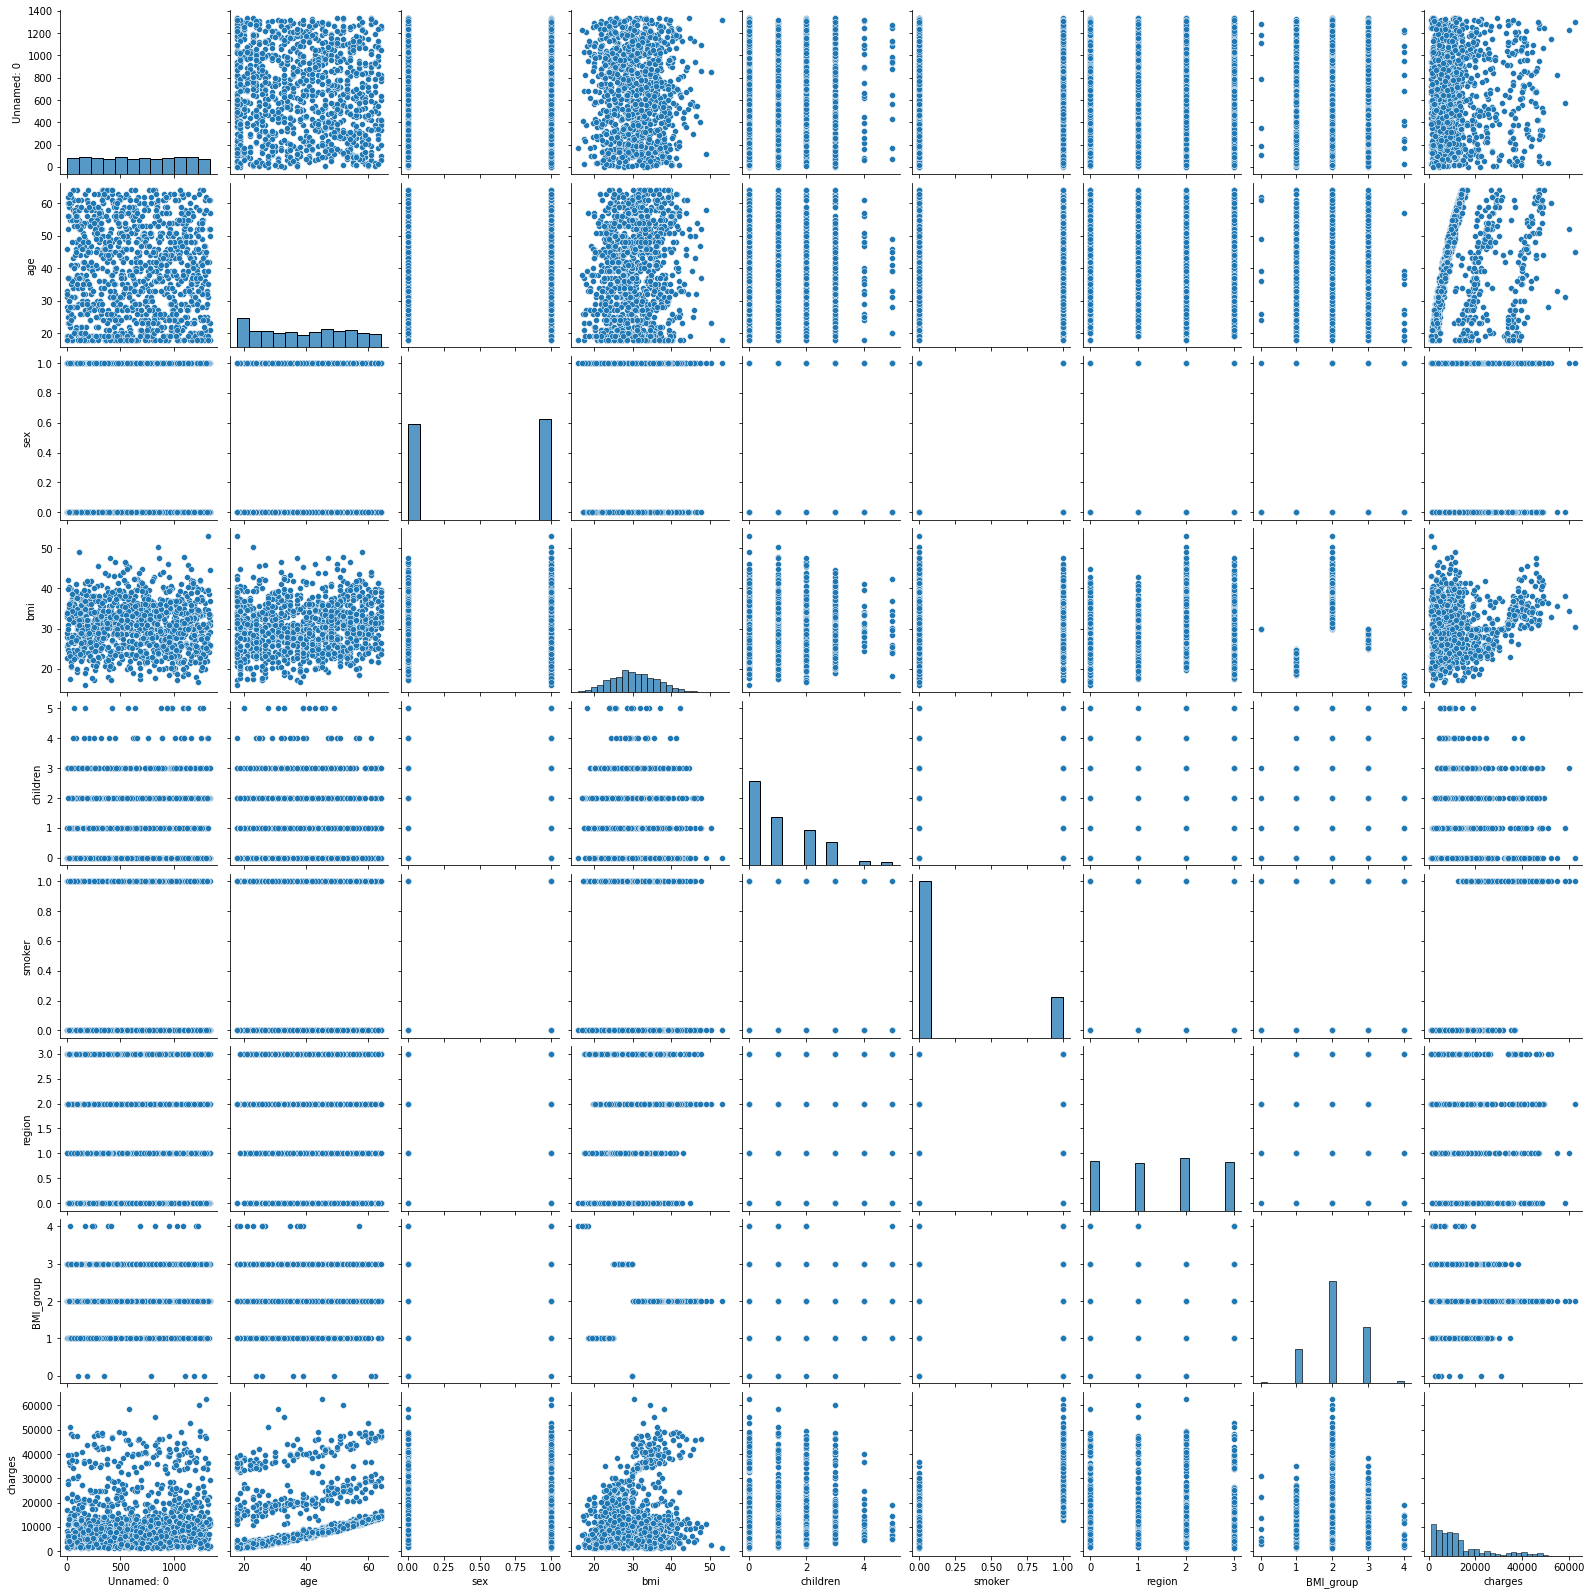

In [95]:
sns.pairplot(train)
plt.show()

In [96]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [97]:
train_ns = train

#columns to sclae
num_vars = ['charges', 'age', 'bmi', 'children']

train_ns[num_vars] = mms.fit_transform(train_ns[num_vars])

In [98]:
train_ns.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,BMI_group,charges
0,560,0.608696,0,0.107345,0.4,0,1,1,0.131313
1,1285,0.630435,0,0.224913,0.0,0,0,1,0.120590
2,1142,0.739130,0,0.239440,0.0,0,2,1,0.422901
3,969,0.456522,0,0.493947,1.0,0,2,2,0.121601
4,486,0.782609,0,0.148238,0.6,0,1,1,0.184696


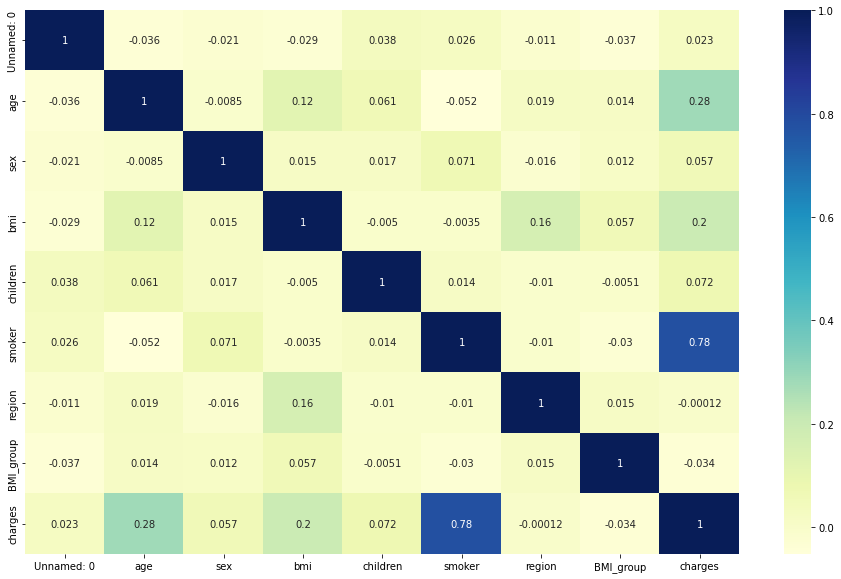

In [99]:
plt.figure(figsize = (16, 10))
sns.heatmap(train_ns.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [100]:
y_train_scaled = train_ns.pop('charges')
X_train_scaled_sm = train_ns[['smoker','age','bmi','children']]


# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train_scaled_sm)
lr = sm.OLS(y_train_scaled, X_train_sm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     762.1
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          1.26e-310
Time:                        14:59:40   Log-Likelihood:                 951.44
No. Observations:                1070   AIC:                            -1893.
Df Residuals:                    1065   BIC:                            -1868.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0551      0.009     -5.885      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_scaled_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled_sm.values, i) for i in range(X_train_scaled_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,bmi,3.17
1,age,2.85
3,children,1.70
0,smoker,1.22


###Residual Analysis


In [102]:
y_train_pred_price = lr.predict(X_train_sm)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

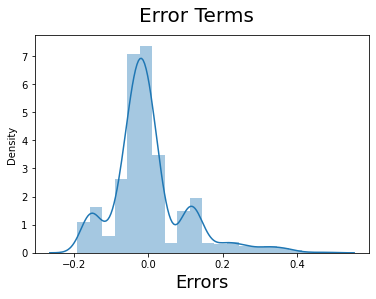

In [103]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_scaled - y_train_pred_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [118]:
test = pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/Mq5p8YpQoz3KbWJRE4Mey1Yoq/insurance_test.csv")

In [119]:
test.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,BMI_group
0,764,45,0,25.175,2,0,0,3
1,887,36,0,30.020,0,0,1,2
2,890,64,0,26.885,0,1,1,3
3,1293,46,1,25.745,3,0,1,3
4,259,19,1,31.920,0,1,1,2


In [120]:
test['charges'] = 0
df_test = test
df_test[num_vars] = mms.transform(test[num_vars])

In [132]:
df_test.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,BMI_group
0,764,0.586957,0,0.247915,0.4,0,0,3
1,887,0.391304,0,0.378262,0.0,0,1,2
2,890,1.000000,0,0.293920,0.0,1,1,3
3,1293,0.608696,1,0.263250,0.6,0,1,3
4,259,0.021739,1,0.429379,0.0,1,1,2


In [133]:
df_test.describe()

,Unnamed: 0,age,sex,bmi,children,smoker,region,BMI_group
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,676.167910,0.448005,0.477612,0.406635,0.208955,0.201493,1.544776,2.194030
std,387.334352,0.303561,0.500433,0.169681,0.232705,0.401866,1.064340,0.713462
min,23.000000,0.000000,0.000000,0.023002,0.000000,0.000000,0.000000,0.000000
25%,349.000000,0.173913,0.000000,0.288169,0.000000,0.000000,1.000000,2.000000
50%,664.500000,0.434783,0.000000,0.398709,0.200000,0.000000,2.000000,2.000000
75%,1003.000000,0.695652,1.000000,0.517622,0.400000,0.000000,2.000000,3.000000
max,1327.000000,1.000000,1.000000,0.985203,1.000000,1.000000,3.000000,4.000000


In [123]:
df_test.pop('charges')
X_test_mm = sm.add_constant(df_test)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [134]:
X_test_mm

,const,age,bmi,children,smoker
0,1.0,0.586957,0.247915,0.4,0
1,1.0,0.391304,0.378262,0.0,0
2,1.0,1.000000,0.293920,0.0,1
3,1.0,0.608696,0.263250,0.6,0
4,1.0,0.021739,0.429379,0.0,1
...,...,...,...,...,...
263,1.0,0.978261,0.514662,0.0,1
264,1.0,0.869565,0.301587,0.0,0
265,1.0,0.434783,0.324590,0.2,0
266,1.0,0.782609,0.846112,0.0,1


In [124]:
#drop uneeded columns
X_test_mm = X_test_mm.drop(['Unnamed: 0','sex','region','BMI_group'], axis = 1)

In [125]:
X_test_mm.head()

,const,age,bmi,children,smoker
0,1.0,0.586957,0.247915,0.4,0
1,1.0,0.391304,0.378262,0.0,0
2,1.0,1.000000,0.293920,0.0,1
3,1.0,0.608696,0.263250,0.6,0
4,1.0,0.021739,0.429379,0.0,1


In [129]:
y_test_pred = lr.predict(X_test_mm)

In [130]:
lr.params

const      -0.055057
smoker      0.384787
age         0.192372
bmi         0.198045
children    0.034748
dtype: float64

In [143]:
rescale = MinMaxScaler()
rescale.min_, rescale.scale_ = mms.min_[0], mms.scale_[0]
rescale.inverse_transform(y_test_pred.values.reshape(-1,1))

array([[19422.14272296],
       [11466.12349909],
       [27002.3607445 ],
       [22552.48616084],
       [ 5465.18553361],
       [16970.17271233],
       [  337.07658378],
       [28372.26649615],
       [ 3302.59603179],
       [25032.00997036],
       [16033.38332216],
       [19088.07118923],
       [10164.72465686],
       [29971.20494425],
       [29410.65820597],
       [26965.74368948],
       [27047.98889355],
       [23796.03646167],
       [18416.19296875],
       [16204.15542771],
       [16036.91855329],
       [20755.93360747],
       [ 2845.61249179],
       [ 7380.32234644],
       [25364.87027839],
       [21567.98113373],
       [25423.0820691 ],
       [14263.62423587],
       [20903.89309221],
       [ 2248.6957724 ],
       [23033.07648663],
       [22838.57197554],
       [ 5296.0999365 ],
       [12481.65933418],
       [ 8752.56140173],
       [19206.92816958],
       [ 5036.25521905],
       [17462.15168033],
       [22390.28454428],
       [17684.89311251],
